# Evaluation examples

In [1]:
%load_ext autoreload
%autoreload 2
%load_ext line_profiler
import numpy as np
from clustercausal.experiments.Simulator import Simulator
from clustercausal.experiments.Evaluator import Evaluator
from clustercausal.algorithms.ClusterPC import ClusterPC as ClusterPC
# from clustercausal.algorithms.ClusterPCv2 import ClusterPC as ClusterPCv2
from clustercausal.clusterdag.ClusterDAG import ClusterDAG
from clustercausal.utils.Utils import *

Detecting 1 CUDA device(s).
2023-09-05 19:57:41,718 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\rpy2\situation.py[line:41] - INFO: cffi mode is CFFI_MODE.ANY
2023-09-05 19:57:41,728 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\rpy2\situation.py[line:218] - INFO: R home found: C:\Program Files\R\R-4.3.1
2023-09-05 19:57:41,754 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\rpy2\rinterface_lib\embedded.py[line:20] - INFO: Default options to initialize R: rpy2, --quiet, --no-save
IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


In [2]:
%autoreload 2
# Node names from 0 to 19
# node_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']#, '10', '11', '12', '13', '14', '15', '16', '17', '18','19']
node_names = None
#seed = 12343
simulation = Simulator(n_nodes = 40, n_edges = 40, n_clusters = 4, seed = 122663, sample_size = 1000, node_names=node_names)
cluster_dag = simulation.run()

2023-09-05 19:57:42,906 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


In [186]:
print(cluster_dag.cluster_mapping)
print(cluster_dag.cluster_edges)

{'C1': ['X1', 'X32', 'X7', 'X36', 'X10', 'X12', 'X26', 'X31', 'X15', 'X17', 'X30', 'X39', 'X27', 'X28', 'X35', 'X3', 'X4', 'X5', 'X19', 'X23', 'X2'], 'C2': ['X6', 'X18', 'X22', 'X25', 'X34', 'X11', 'X14'], 'C3': ['X20', 'X21', 'X37', 'X38', 'X8', 'X29', 'X24', 'X16', 'X40', 'X13', 'X9'], 'C4': ['X33']}
[('C1', 'C2'), ('C1', 'C3'), ('C2', 'C3'), ('C2', 'C4'), ('C3', 'C4'), ('C1', 'C4')]


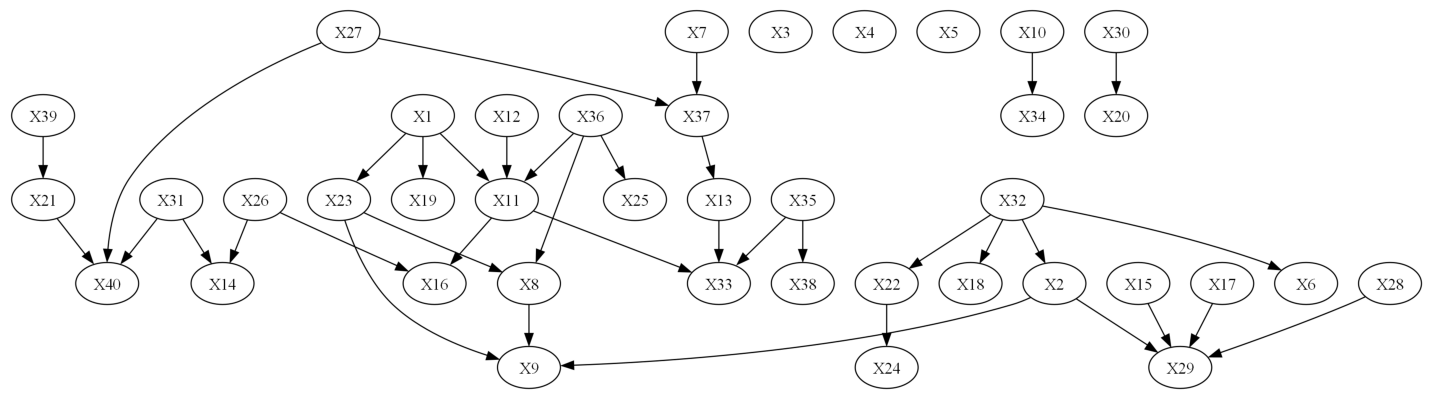

In [187]:
cluster_dag.true_dag.draw_pydot_graph()

In [188]:
# cluster_dag.cdag_to_mpdag()
# cluster_dag.draw_mpdag()

In [189]:
# c4 = ClusterDAG.get_node_by_name('C4', cluster_dag.cluster_graph)
# c4_local_graph = cluster_dag.get_local_graph(cluster = c4)
# c4_local_graph.draw_pydot_graph()

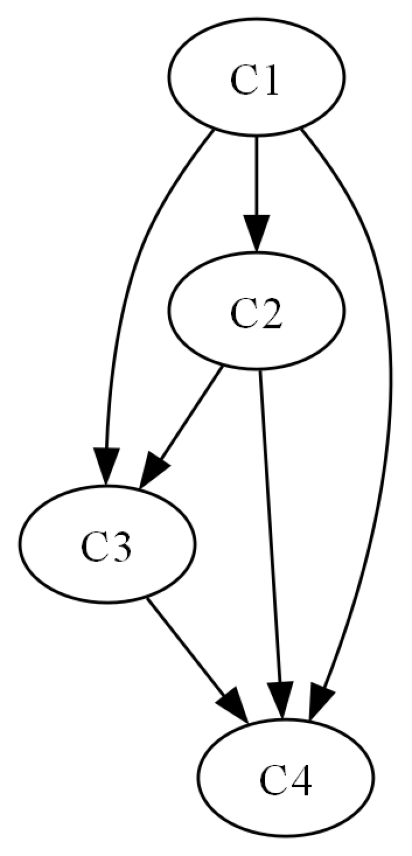

In [190]:
cluster_dag.draw_cluster_graph()

In [211]:
cluster_pcv1 = ClusterPCv1(cdag = cluster_dag, data = cluster_dag.data, alpha = 0.1, \
                  indep_test = "fisherz", \
                  verbose = False, show_progress=True)
%lprun -f cluster_pcv1.run -f cluster_pcv1.into_cluster_phase cluster_pcv1.run()

The line_profiler extension is already loaded. To reload it, use:
  %reload_ext line_profiler






Into: ->C1, no parents, nothing to do  : 100%|██████████| 1/1 [00:00<00:00, 166.78it/s, duration: 0.02sec]


















































In:     C1, Depth=0, working on node 38: 100%|██████████| 21/21 [00:00<00:00, 164.16it/s, duration: 0.39sec]





































































































Into: ->C2, Depth=9, working on node 33: 100%|██████████| 7/7 [00:00<00:00, 132.19it/s, duration: 2.72sec]















































In:     C2, Depth=0, working on node 33: 100%|██████████| 7/7 [00:00<00:00, 128.07it/s, duration: 0.38sec]





















































































































































































































































Into: ->C3, Depth=13, working on node 39: 100%|██████████| 11/11 [00:00<00:00, 131.06it/s, duration: 47.62sec]














Duration of algorithm was 54.66sec


Timer unit: 1e-07 s

Total time: 54.6545 s
File: c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\clustercausal\algorithms\ClusterPCv1.py
Function: run at line 75

Line #      Hits         Time  Per Hit   % Time  Line Contents
    75                                               def run(self) -> CausalGraph:
    76                                                   """
    77                                                   Runs the C-PC algorithm.
    78                                                   Updates self.cdag.cg each step, which is a CausalGraph object.
    79                                                   """
    80         1         15.0     15.0      0.0          start = time.time()
    81         1         12.0     12.0      0.0          no_of_var = self.data.shape[1]
    82                                                   # pbar = tqdm(total=no_of_var) if self.show_progress else None
    83         1          6.0      6.0      0.0          if self.verbose:
 

In [7]:
cluster_pcv1 = ClusterPCv1(cdag = cluster_dag, data = cluster_dag.data, alpha = 0.1, \
                  indep_test = "fisherz", \
                  verbose = False, show_progress=True)
est_graph_v1 = cluster_pcv1.run()

In:     C4, Depth=0, working on node 32: 100%|██████████| 1/1 [00:00<00:00, 28.60it/s, duration: 0.14sec]


Duration of algorithm was 1349.54sec


In [5]:
%load_ext line_profiler
cluster_pcv2 = ClusterPCv2(cdag = cluster_dag, data = cluster_dag.data, alpha = 0.1, \
                  indep_test = "fisherz", \
                  verbose = False, show_progress=True)
%lprun -f cluster_pcv2.run -f cluster_pcv2.cluster_phase cluster_pcv2.run()

The line_profiler extension is already loaded. To reload it, use:
  %reload_ext line_profiler


C4 phase, Depth=5, working on node 32: 100%|██████████| 1/1 [00:00<00:00, 20.85it/s, duration: 0.52sec]


Duration of algorithm was 3.47sec


Timer unit: 1e-07 s

Total time: 3.46767 s
File: c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\clustercausal\algorithms\ClusterPCv2.py
Function: run at line 75

Line #      Hits         Time  Per Hit   % Time  Line Contents
    75                                               def run(self) -> CausalGraph:
    76         1         13.0     13.0      0.0          start = time.time()
    77         1         13.0     13.0      0.0          no_of_var = self.data.shape[1]
    78         1         12.0     12.0      0.0          assert len(self.cdag.node_names) == no_of_var
    79         1          5.0      5.0      0.0          if self.verbose:
    80                                                       print(
    81                                                           f"Topological ordering {(self.cdag.cdag_list_of_topological_sort)}"
    82                                                       )
    83         4         33.0      8.2      0.0          for cluster_name in s

In [9]:
cluster_pcv2 = ClusterPCv2(cdag = cluster_dag, data = cluster_dag.data, alpha = 0.1, \
                  indep_test = "fisherz", \
                  verbose = False, show_progress=True, true_dag = cluster_dag.true_dag.nx_graph)
est_graph_v2= cluster_pcv2.run()

C4 phase, Depth=5, working on node 32: 100%|██████████| 1/1 [00:00<00:00, 26.33it/s, duration: 0.45sec]


Duration of algorithm was 2.89sec


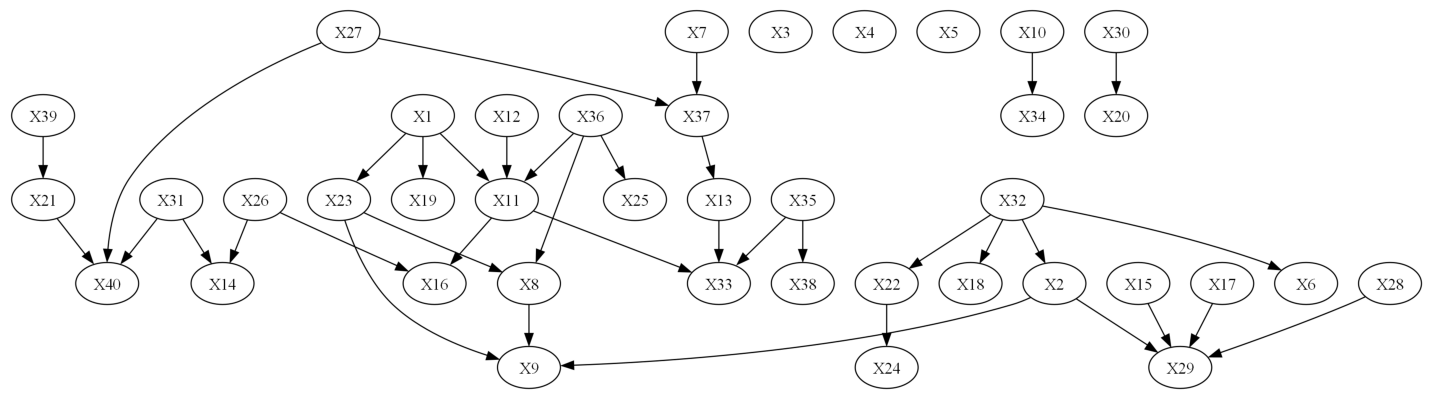

In [193]:
cluster_dag.true_dag.draw_pydot_graph()

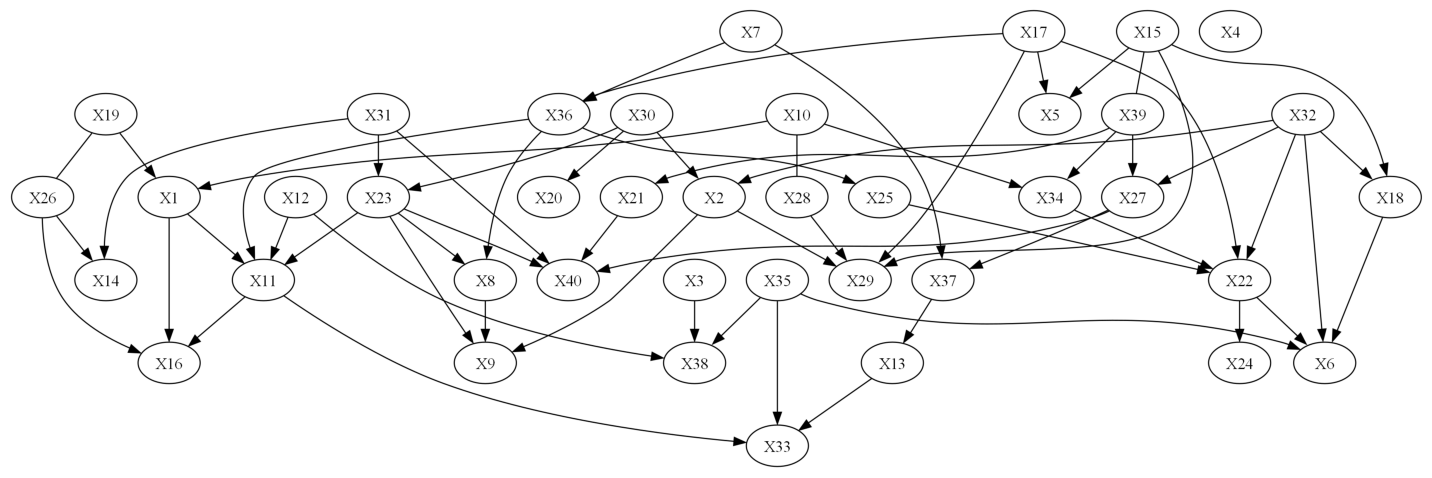

In [194]:
est_graph_v1.draw_pydot_graph()

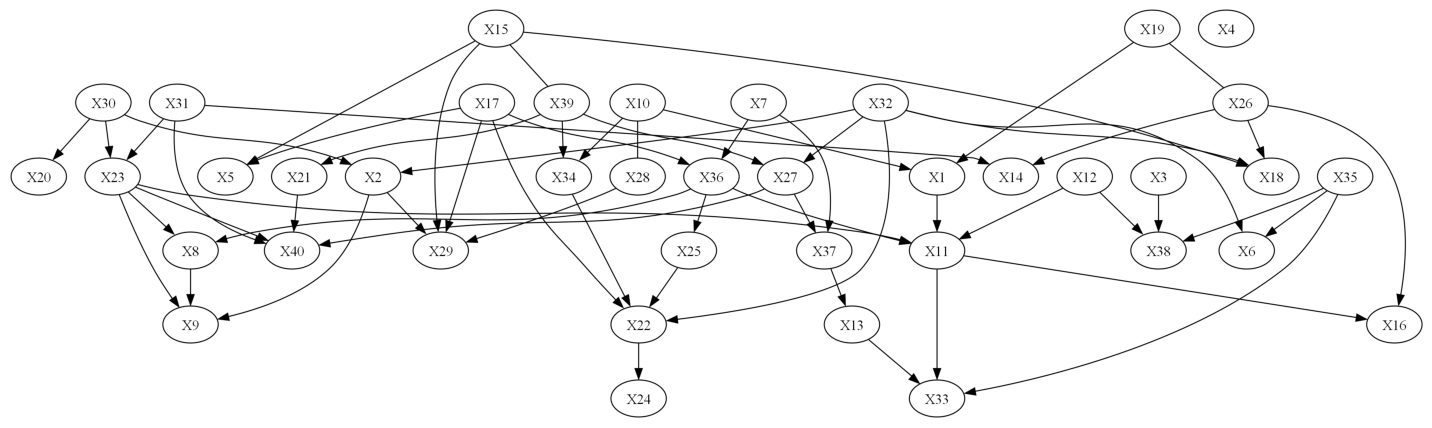

In [195]:
est_graph_v2.draw_pydot_graph()

In [196]:
evaluation_v1 = Evaluator(truth = cluster_dag.true_dag.G, est = est_graph_v1.G)
adjacency_confusion_v1, arrow_confusion_v1, shd_v1, sid_v1 = evaluation_v1.get_causallearn_metrics(sid = False)
print("Adjacency confusion: ", adjacency_confusion_v1)
print("Arrow confusion: ", arrow_confusion_v1)
print("SHD: ", shd_v1)
print("SID: ", sid_v1)

Adjacency confusion:  {'true_positive': 36, 'false_positive': 26, 'false_negative': 1, 'true_negative': 717, 'precision': 0.5806451612903226, 'recall': 0.972972972972973, 'f1_score': 0.7272727272727273}
Arrow confusion:  {'true_positive': 35.0, 'false_positive': 24.0, 'false_negative': 2.0, 'true_negative': 1539.0, 'precision': 0.5932203389830508, 'recall': 0.9459459459459459, 'f1_score': 0.7291666666666666, 'true_positive_ce': 35.0, 'false_positive_ce': 1.0, 'false_negative_ce': 1.0, 'true_negative_ce': 1563.0, 'precision_ce': 0.9722222222222222, 'recall_ce': 0.9722222222222222, 'f1_score_ce': 0.9722222222222222}
SHD:  28
SID:  {'sid_lower': None}


In [10]:
evaluation_v2 = Evaluator(truth = cluster_dag.true_dag.G, est = est_graph_v2.G)
adjacency_confusion_v2, arrow_confusion_v2, shd_v2, sid_v2 = evaluation_v2.get_causallearn_metrics(sid = False)
print("Adjacency confusion: ", adjacency_confusion_v2)
print("Arrow confusion: ", arrow_confusion_v2)
print("SHD: ", shd_v2)
print("SID: ", sid_v2)

Adjacency confusion:  {'true_positive': 36, 'false_positive': 24, 'false_negative': 1, 'true_negative': 719, 'precision': 0.6, 'recall': 0.972972972972973, 'f1_score': 0.7422680412371134}
Arrow confusion:  {'true_positive': 35.0, 'false_positive': 22.0, 'false_negative': 2.0, 'true_negative': 1541.0, 'precision': 0.6140350877192983, 'recall': 0.9459459459459459, 'f1_score': 0.7446808510638299, 'true_positive_ce': 35.0, 'false_positive_ce': 1.0, 'false_negative_ce': 1.0, 'true_negative_ce': 1563.0, 'precision_ce': 0.9722222222222222, 'recall_ce': 0.9722222222222222, 'f1_score_ce': 0.9722222222222222}
SHD:  26
SID:  {'sid_lower': None}


In [198]:
print(adjacency_confusion_v1 == adjacency_confusion_v2)
print(arrow_confusion_v1 == arrow_confusion_v2)
print(shd_v1 == shd_v2)
print(sid_v1 == sid_v2)

False
False
False
True


In [12]:
# Comparison with baseline pc
from causallearn.search.ConstraintBased.PC import pc
# node_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
causallearn_cg = pc(cluster_dag.data, alpha = 0.1, verbose=False, node_names=node_names)

Depth=3, working on node 39: 100%|██████████| 40/40 [00:00<00:00, 760.14it/s] 


In [13]:
evaluation_causallearn = Evaluator(truth = cluster_dag.true_dag.G, est = causallearn_cg.G)
cl_adjacency_confusion, cl_arrow_confusion, cl_shd, cl_sid  = evaluation_causallearn.get_causallearn_metrics(sid = False)
print("Adjacency confusion: ", cl_adjacency_confusion)
print("Arrow confusion: ", cl_arrow_confusion)
print("SHD: ", cl_shd)
# print("SID", cl_sid)

Adjacency confusion:  {'true_positive': 35, 'false_positive': 11, 'false_negative': 2, 'true_negative': 732, 'precision': 0.7608695652173914, 'recall': 0.9459459459459459, 'f1_score': 0.8433734939759038}
Arrow confusion:  {'true_positive': 23.0, 'false_positive': 17.0, 'false_negative': 14.0, 'true_negative': 1546.0, 'precision': 0.575, 'recall': 0.6216216216216216, 'f1_score': 0.5974025974025973, 'true_positive_ce': 23.0, 'false_positive_ce': 6.0, 'false_negative_ce': 12.0, 'true_negative_ce': 1559.0, 'precision_ce': 0.7931034482758621, 'recall_ce': 0.6571428571428571, 'f1_score_ce': 0.71875}
SHD:  19


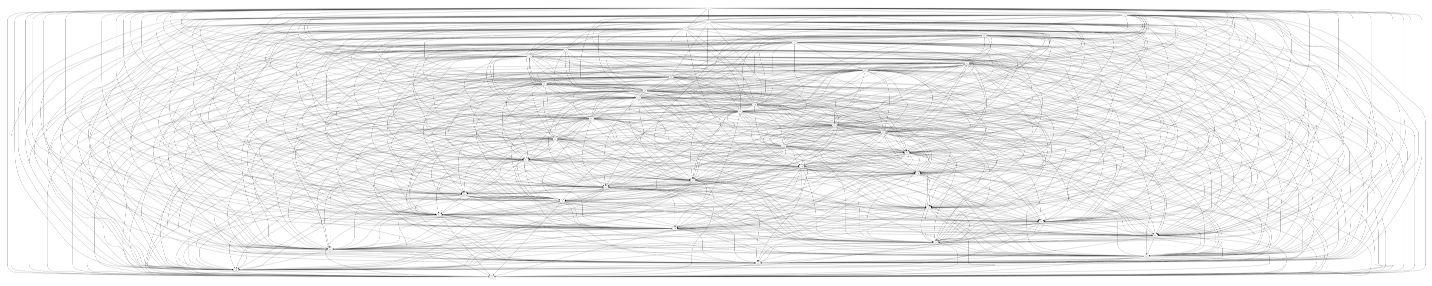

In [201]:
cluster_dag.cdag_to_mpdag()
cluster_dag.draw_mpdag()

In [202]:
pruned_causallearn_cg = Evaluator.get_cluster_pruned_benchmark(cluster_dag, cluster_dag.cg)
pruned_evaluation_causallearn = Evaluator(truth = cluster_dag.true_dag.G, est = pruned_causallearn_cg.G)
pruned_cl_adjacency_confusion, pruned_cl_arrow_confusion, pruned_cl_shd, pruned_cl_sid  = pruned_evaluation_causallearn.get_causallearn_metrics(sid = False)
print("Adjacency confusion: ", pruned_cl_adjacency_confusion)
print("Arrow confusion: ", pruned_cl_arrow_confusion)
print("SHD: ", pruned_cl_shd)

Adjacency confusion:  {'true_positive': 37, 'false_positive': 743, 'false_negative': 0, 'true_negative': 0, 'precision': 0.047435897435897434, 'recall': 1.0, 'f1_score': 0.0905752753977968}
Arrow confusion:  {'true_positive': 31.0, 'false_positive': 463.0, 'false_negative': 6.0, 'true_negative': 1100.0, 'precision': 0.06275303643724696, 'recall': 0.8378378378378378, 'f1_score': 0.1167608286252354, 'true_positive_ce': 31.0, 'false_positive_ce': 0.0, 'false_negative_ce': 6.0, 'true_negative_ce': 1563.0, 'precision_ce': 1.0, 'recall_ce': 0.8378378378378378, 'f1_score_ce': 0.911764705882353}
SHD:  743


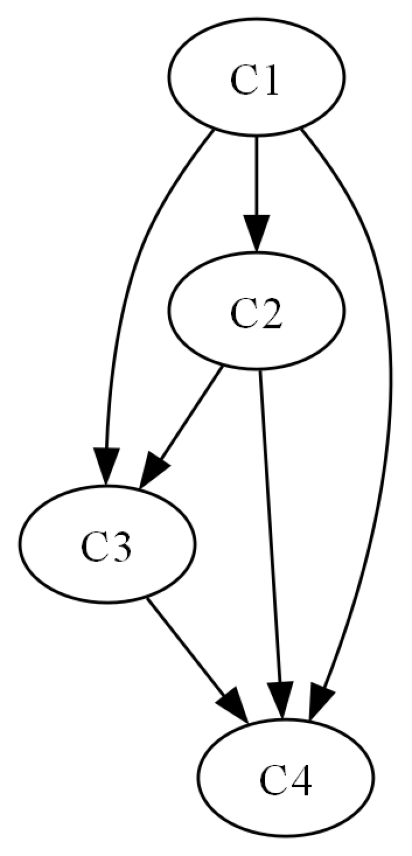

In [203]:
cluster_dag.cluster_graph.draw_pydot_graph()

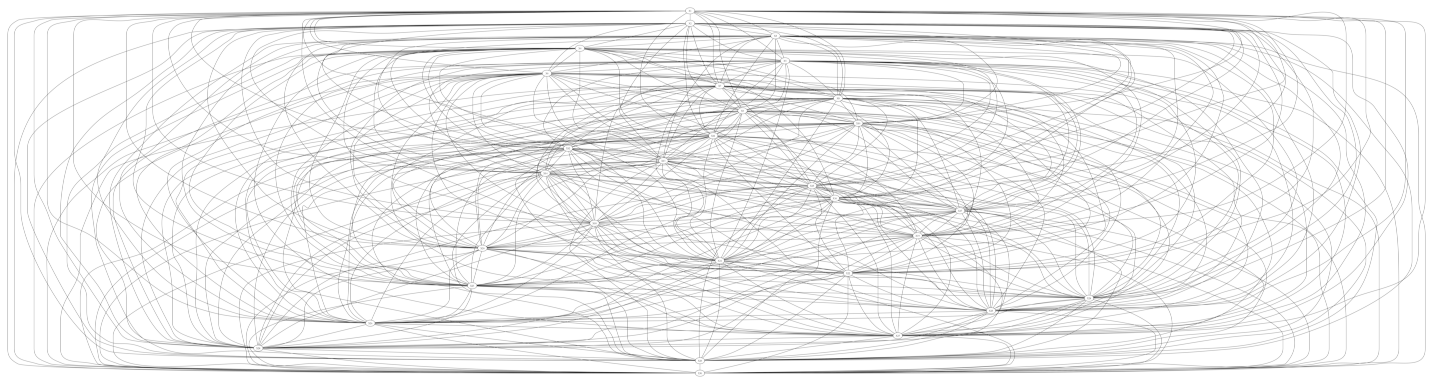

In [204]:
from causallearn.graph.GraphClass import CausalGraph
cg_full = CausalGraph(no_of_var = 30)
cg_full.draw_pydot_graph()

In [205]:
full_evaluation = Evaluator(truth = cluster_dag.true_dag.G, est = cg_full.G)
full_adjacency_confusion, full_arrow_confusion, full_shd, full_sid  = full_evaluation.get_causallearn_metrics(sid = False)
print("Adjacency confusion: ", full_adjacency_confusion)
print("Arrow confusion: ", full_arrow_confusion)
print("SHD: ", full_shd)

AssertionError: 

In [ ]:
# causallearn_cg_dsep = pc(cluster_dag.data, alpha = 0.01, indep_test = 'd_separation',  verbose=False, node_names=node_names, true_dag = cluster_dag.true_dag.nx_graph)

In [ ]:
evaluation_causallearn_dsep = Evaluator(truth = cluster_dag.true_dag.G, est = causallearn_cg_dsep.G)
cl_adjacency_confusion, cl_arrow_confusion, cl_shd, cl_sid = evaluation_causallearn_dsep.get_causallearn_metrics(sid = True)
print("Adjacency confusion: ", cl_adjacency_confusion)
print("Arrow confusion: ", cl_arrow_confusion)
print("SHD: ", cl_shd)
print("SID", cl_sid)

NameError: name 'causallearn_cg_dsep' is not defined

In [ ]:
print(adjacency_confusion == cl_adjacency_confusion)
print(arrow_confusion == cl_arrow_confusion)
print(shd == cl_shd)

True
False
True


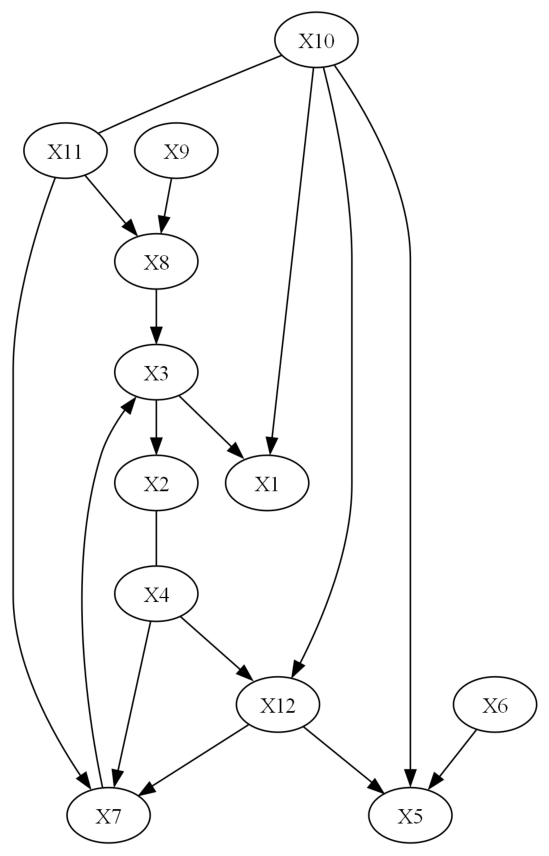

In [ ]:
causallearn_cg.draw_pydot_graph()

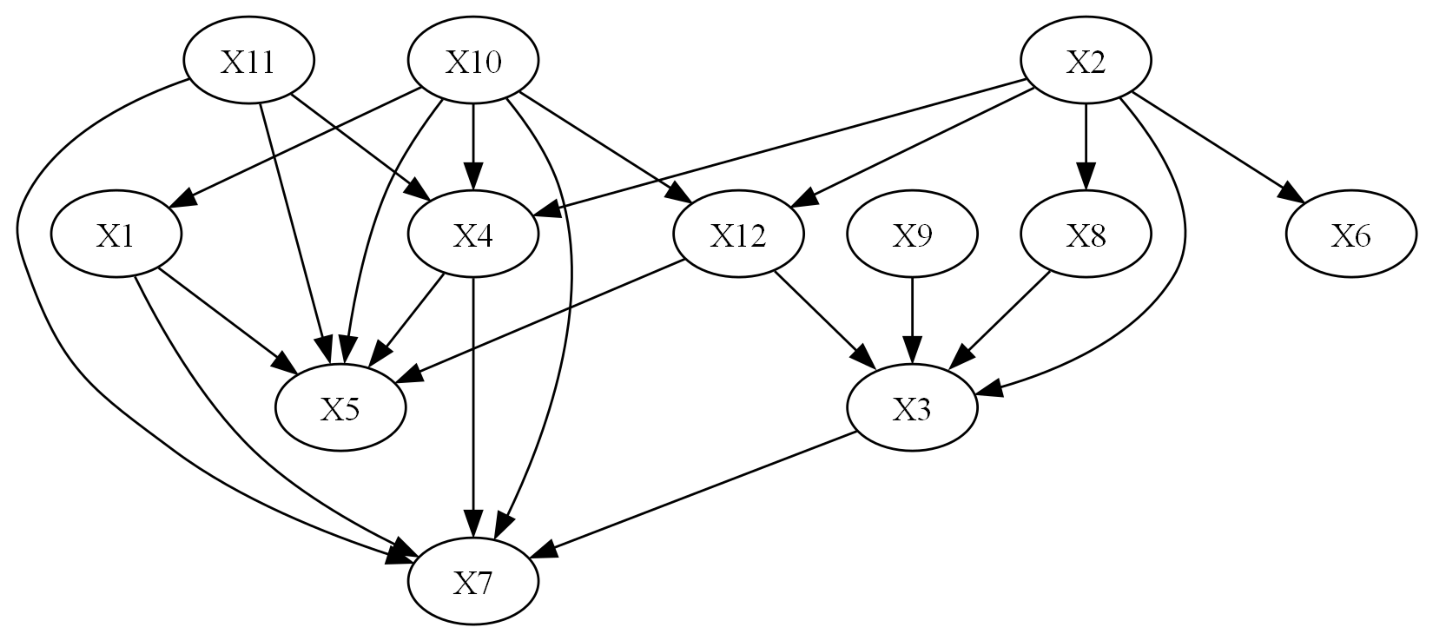

In [ ]:
cluster_dag.true_dag.draw_pydot_graph()

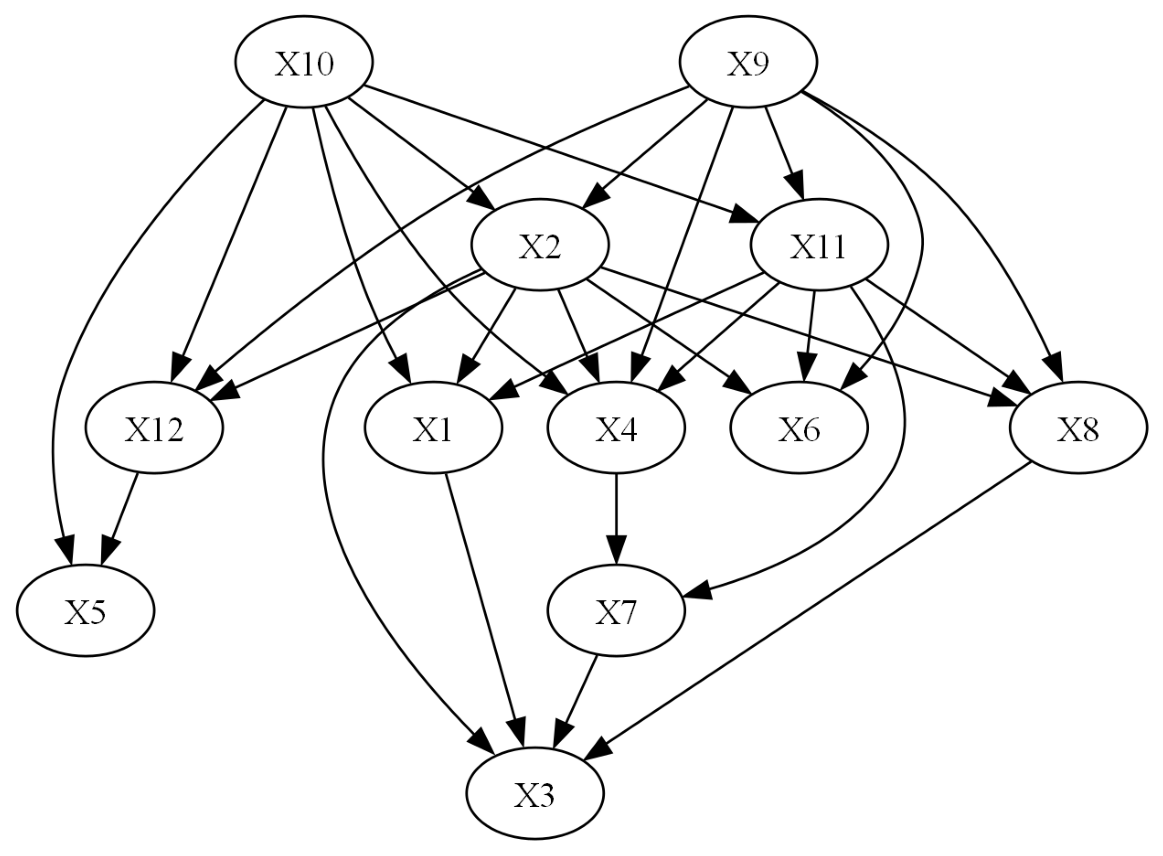

In [ ]:
est_graph.draw_pydot_graph()

{'C1': ['X10'], 'C2': ['X2', 'X9', 'X11', 'X1'], 'C3': ['X6'], 'C4': ['X8', 'X12'], 'C5': ['X4'], 'C6': ['X3', 'X5', 'X7']}


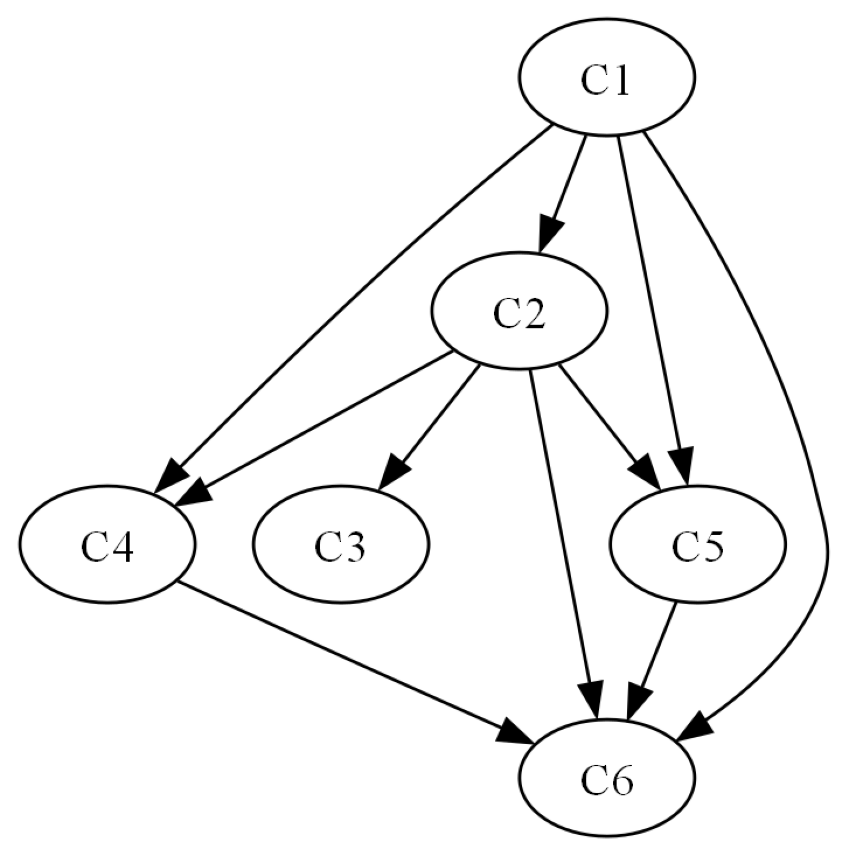

In [ ]:
print(cluster_dag.cluster_mapping)
cluster_dag.cluster_graph.draw_pydot_graph()

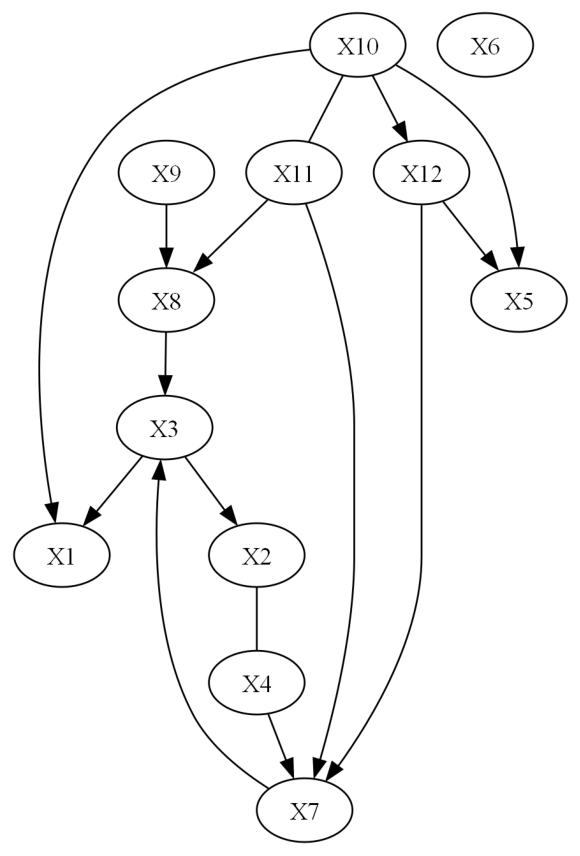

In [ ]:
causallearn_cg.draw_pydot_graph()

In [ ]:
from causallearn.graph.Edge import Edge
from causallearn.graph.Endpoint import Endpoint
n_6 = ClusterDAG.get_node_by_name('X6', cluster_dag.true_dag)
n_8 = ClusterDAG.get_node_by_name('X8', cluster_dag.true_dag)
edge = Edge(n_6, n_8, Endpoint.TAIL, Endpoint.ARROW)
test_cg = causallearn_cg
test_cg.G.add_edge(edge)

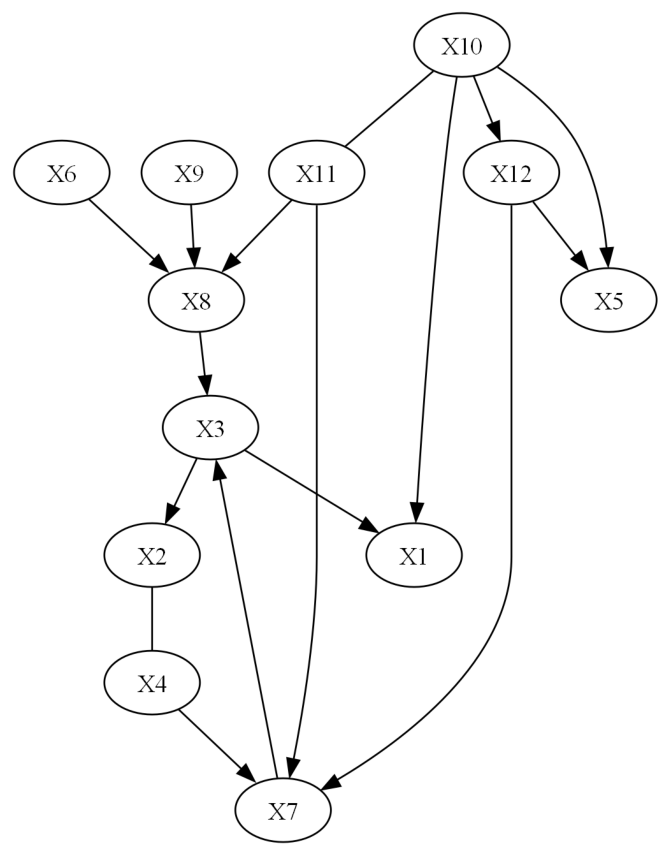

In [ ]:
test_cg.draw_pydot_graph()

In [ ]:
from clustercausal.clusterdag.ClusterDAG import ClusterDAG
from causallearn.graph.Edge import Edge
from causallearn.graph.Endpoint import Endpoint

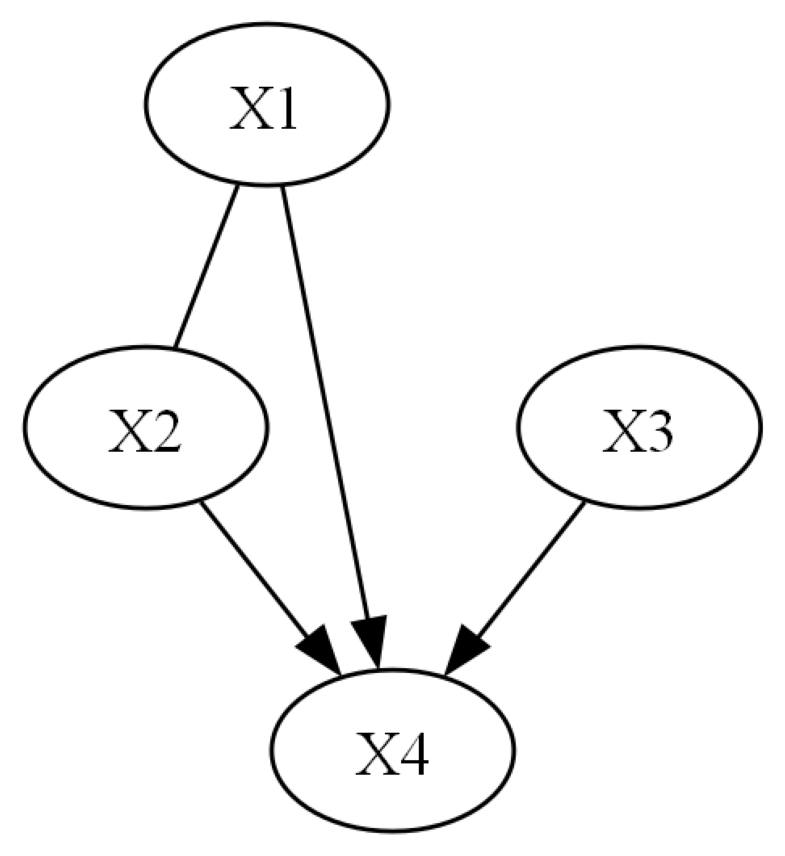

In [ ]:
cluster_mapping = {'C1' : ['X1', 'X2'], 'C2' : ['X3'], 'C3' : ['X4']}
cluster_edges = [('C1', 'C3'), ('C2', 'C3')]
cdag = ClusterDAG(cluster_mapping = cluster_mapping, cluster_edges = cluster_edges)
cdag.cdag_to_mpdag()
cdag.cg.draw_pydot_graph()

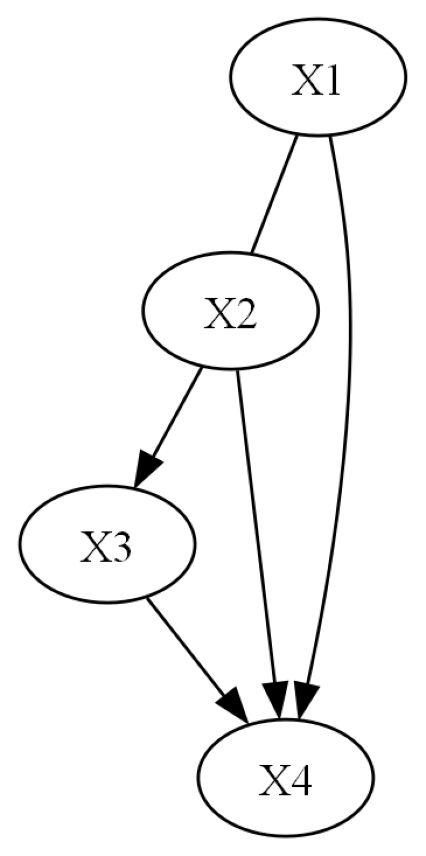

In [ ]:
n_2 = ClusterDAG.get_node_by_name('X2', cdag.cg)
n_3 = ClusterDAG.get_node_by_name('X3', cdag.cg)
edge = Edge(n_2, n_3, Endpoint.TAIL, Endpoint.ARROW)
wrong_cg = cdag.cg
wrong_cg.G.add_edge(edge)
wrong_cg.draw_pydot_graph()

In [ ]:
%load_ext autoreload
%autoreload 2
from clustercausal.experiments.Evaluator import Evaluator
pruned_cg = Evaluator.get_cluster_pruned_benchmark(cdag = cdag, cg = wrong_cg)
pruned_cg == cdag.cg

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


True

In [ ]:
# n_1 = ClusterDAG.get_node_by_name('X1', cdag.cg)
# n_2 = ClusterDAG.get_node_by_name('X2', cdag.cg)
# edge = Edge(n_1, n_2, Endpoint.TAIL, Endpoint.TAIL)
# cdag.cg.G.remove_edge(edge)
# cdag.cg.draw_pydot_graph()

In [ ]:
test_cg = evaluation.get_cluster_pruned_benchmark(cdag = cdag, cg = cdag.cg)
test_cg.draw_pydot_graph()